# [KDT] ch4 데이터 전처리

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.__version__

'1.4.4'

### 결측 값 (missing value)
* isna(), dropna(), fillna()
* 결측값 처리 방법
* 수작업으로 채워 넣음
* 특정값 사용
* 평균값 사용 (전체 평균 혹은 기준 속성 평균)
* 가장 가능성이 높은 값 사용 (회귀분석, 보간법 등)
* 해당 데이터 행을 모두 제거


In [4]:
# 파일 로딩
df_hk_na = pd.read_csv('./data/hk_221206_na.csv')



name            0
jumin7          0
gender          0
height          0
age            16
blood_type     16
company         0
grades          0
salary         16
expenditure     0
dtype: int64

In [5]:
# 결측값 확인
df_hk_na.isna().sum()

name            0
jumin7          0
gender          0
height          0
age            16
blood_type     16
company         0
grades          0
salary         16
expenditure     0
dtype: int64

In [14]:
# df_hk.info() info()로 확인가능
df_hk_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         250 non-null    object 
 1   jumin7       250 non-null    object 
 2   gender       250 non-null    object 
 3   height       250 non-null    float64
 4   age          234 non-null    float64
 5   blood_type   234 non-null    object 
 6   company      250 non-null    object 
 7   grades       250 non-null    object 
 8   salary       234 non-null    float64
 9   expenditure  250 non-null    int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 19.7+ KB


In [25]:
# df_hk['age'] 확인
df_hk_na.loc[df_hk_na['age'].isna()]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,NaN,NaN,A,A,NaN,1975
3,hkd101,931226-2,F,155.3,NaN,NaN,B,B,NaN,2935
4,hkd102,920123-1,M,188.6,NaN,NaN,B,F,NaN,4015
6,hkd104,990623-1,M,176.0,NaN,NaN,B,A,NaN,2375
20,hkd117,860117-2,F,163.0,NaN,NaN,B,A,NaN,3355
29,hkd125,780112-2,F,169.1,NaN,NaN,B,A,NaN,4335
58,hkd151,781212-1,M,175.8,NaN,NaN,B,A,NaN,4755
59,hkd152,770202-1,M,176.8,NaN,NaN,B,A,NaN,4945
110,hkd199,820104-2,F,167.2,NaN,NaN,B,A,NaN,3785
170,hkd27,730716-1,M,171.7,NaN,NaN,A,B,NaN,6770


In [16]:
# 수작업으로 채워 넣음, 특정값 사용
df_hk_na['age'].fillna(20)

0      20.0
1      31.0
2      55.0
3      20.0
4      20.0
       ... 
245    50.0
246    51.0
247    52.0
248    20.0
249    54.0
Name: age, Length: 250, dtype: float64

In [18]:
# 수작업으로 채워 넣음, 평균값 사용 (전체 평균 혹은 기준 속성 평균)
df_hk_na['age'].fillna(df_hk_na['age'].mean())

0      39.337607
1      31.000000
2      55.000000
3      39.337607
4      39.337607
         ...    
245    50.000000
246    51.000000
247    52.000000
248    39.337607
249    54.000000
Name: age, Length: 250, dtype: float64

In [19]:
# 해당 데이터 행을 모두 제거
df_hk_na.dropna(subset='age')

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
1,hkd10,900303-2,F,169.4,31.0,A,A,B,4720.0,2970
2,hkd100,681205-2,F,168.3,55.0,A,A,B,7280.0,5905
5,hkd103,910215-2,F,150.2,30.0,A,B,A,3290.0,1915
7,hkd105,980717-2,F,163.4,23.0,B,B,B,3080.0,1330
8,hkd106,970818-1,M,186.3,24.0,AB,B,C,3110.0,2360
...,...,...,...,...,...,...,...,...,...,...
244,hkd94,720614-1,M,174.1,49.0,O,A,B,8540.0,7165
245,hkd95,730710-2,F,157.8,50.0,A,A,A,6990.0,4865
246,hkd96,720805-2,F,150.4,51.0,O,A,A,7110.0,4985
247,hkd97,710929-1,M,172.4,52.0,A,A,B,8000.0,6625


### 이상값(outlier)

* Turkey 방법 (IQR*1.5)


In [95]:
# 파일 로딩 
df = pd.read_csv('./data/hk_221206.csv')

In [28]:
# EDA
df.describe()

,height,age,salary,expenditure
count,250.000000,250.000000,250.000000,250.000000
mean,169.569200,39.240000,6357.480000,4971.480000
std,12.283857,8.653899,1849.791383,1861.112508
min,148.100000,20.000000,3080.000000,1330.000000
25%,159.300000,33.000000,5002.500000,3593.750000
50%,168.750000,39.000000,6100.000000,4762.500000
75%,180.375000,46.000000,7427.500000,6272.500000
max,191.800000,55.000000,11990.000000,10865.000000


In [40]:
# quantile
q1 = df['expenditure'].quantile(0.25)
q2 = df['expenditure'].quantile(0.75)
print(q1,q2)

3593.75 6272.5


In [45]:
# quantile
q11,q22,q33 = df['expenditure'].quantile([0.25,0.5,0.75])
print(q11,q22,q33)

IQR = q33-q11
print(IQR)
lo = q11 - (IQR*1.5)
hi = q33 + (IQR*1.5)

3593.75 4762.5 6272.5
2678.75


In [ ]:
# salary, expenditure 이상값 있음


In [ ]:
# salary, expenditure 이상값 있음


In [64]:
# salary, expenditure 이상값 추출
df[((df['expenditure'] < lo) | (df['expenditure'] > hi))]


,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure


In [61]:
# 삭제할 row index 추출
drop_index = df[((df['expenditure'] < lo) | (df['expenditure'] > hi))].index

In [62]:
# drop(row index 사용)으로 삭제
df = df.drop(index = drop_index)

In [66]:
# 조건으로 삭제
df[(df['expenditure'] >= lo) | (df['expenditure'] <= hi)]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015
...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


### 결합 (join)
* merge - inner, left, right join

In [67]:
# 파일 로딩 
df[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970


In [ ]:
# merge 실습 파일 생성


In [ ]:
# merge  (inner join default)


In [ ]:
# merge   (left join)


In [ ]:
# merge   (right join)


In [ ]:
# merge   (outer join)


### Sampling
* Random sampling
* Stratified Random Sampling 
* Sytematic sampling
* Cluster sampling

In [87]:
# 파일 로딩 
df[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970


In [96]:
# Random sampling
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(df,train_size=0.7, random_state = 123)

In [108]:
# Sytematic sampling
df_index = df.reset_index()
df_index

# 5 ==0 test
# 5 != 0 train

df_test = df_index[df_index['index'] % 5 == 0]
df_train = df_index[df_index['index']%5 != 0]
df_train.head()

,index,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
1,1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015
6,6,hkd104,990623-1,M,176.0,22,A,B,A,3750,2375


In [111]:
# Cluster sampling
df_Cluster = df[df['company'] == 'A']
df_Cluster

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
12,hkd11,890419-1,M,188.2,32,B,A,B,4820,3070
23,hkd12,881109-2,F,170.2,33,AB,A,A,5080,2955
...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


In [116]:
# Stratified Random Sampling
df['company'].value_counts()
pd.crosstab(df['company'], df['gender'], margins=True)

gender,F,M,All
company,,,
A,40,60,100
B,47,53,100
C,25,25,50
All,112,138,250


### Normalization
* min_max scaling (최소-최대 변환)
* standard scaling (Z-score 변환)

In [117]:
# 파일 로딩 
df[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970


array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'expenditure'}>]], dtype=object)

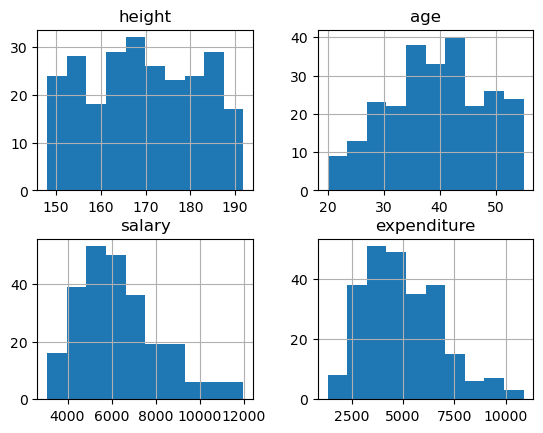

In [118]:
# histogram 확인
df.hist()

<AxesSubplot:ylabel='Count'>

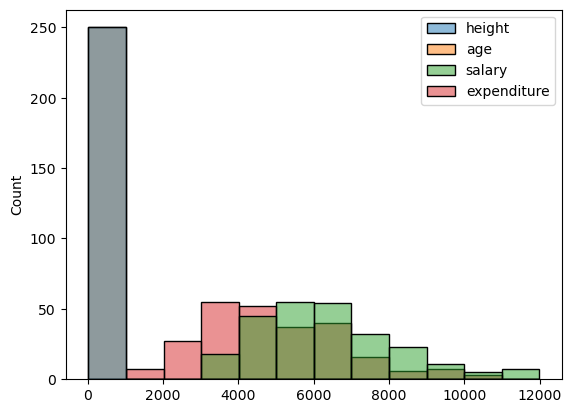

In [122]:
# histogram 확인
sns.histplot(df[['height','age','salary','expenditure']])


In [134]:
# min_max scaling (최소-최대 변환)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

model = MinMaxScaler().fit(df[['height','age','salary','expenditure']].values)
minmax = model.transform(df[['height','age','salary','expenditure']])
df_min_max = pd.DataFrame(minmax,columns = ['height','age','salary','expenditure'])
df_min_max


,height,age,salary,expenditure
0,0.315789,0.057143,0.114478,0.067646
1,0.487414,0.314286,0.184063,0.171998
2,0.462243,1.000000,0.471380,0.479811
3,0.164760,0.228571,0.109989,0.168327
4,0.926773,0.257143,0.147026,0.281594
...,...,...,...,...
245,0.221968,0.857143,0.438833,0.370739
246,0.052632,0.885714,0.452301,0.383325
247,0.556064,0.914286,0.552189,0.555322
248,0.425629,0.942857,0.637486,0.635029


In [133]:

type(df['height'])

pandas.core.series.Series

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'expenditure'}>]], dtype=object)

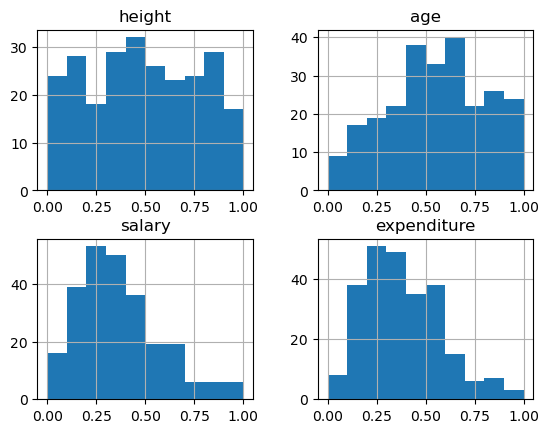

In [135]:
# histogram 확인
df_min_max.hist()

In [138]:
# standard scaling (Z-score 변환)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

model = StandardScaler().fit(df[['height','age','salary','expenditure']].values)
standard = model.transform(df[['height','age','salary','expenditure']])
df_stand = pd.DataFrame(standard,columns = ['height','age','salary','expenditure'])
df_stand



,height,age,salary,expenditure
0,-0.625584,-1.996162,-1.222845,-1.613278
1,-0.013802,-0.954082,-0.887000,-1.077579
2,-0.103530,1.824798,0.499716,0.502599
3,-1.163952,-1.301442,-1.244513,-1.096422
4,1.552361,-1.185655,-1.065756,-0.514960
...,...,...,...,...
245,-0.960025,1.245864,0.342627,-0.057328
246,-1.563650,1.361651,0.407630,0.007279
247,0.230911,1.477438,0.889730,0.890240
248,-0.234043,1.593224,1.301411,1.299417


array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'expenditure'}>]], dtype=object)

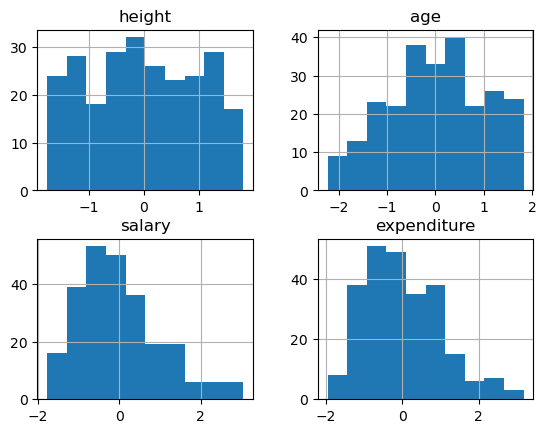

In [139]:
# histogram 확인
df_stand.hist()